### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data loading

In [2]:
# Loading data as weather_data

weather_data = pd.read_excel('C:/Users/avesk/Downloads/ML Classification Project/sydney_rain prediction.xlsx')

In [3]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


### Data Preprocessing

In [4]:
# Getting info about data and data type
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [5]:
weather_data.shape

(3337, 17)

In [6]:
# Check for null value
weather_data.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [7]:
# Filling NaN value/missing value with their mean value

columns_to_fill = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                   'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                   'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

weather_data[columns_to_fill] = weather_data[columns_to_fill].fillna(weather_data[columns_to_fill].mean())


In [8]:
weather_data.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       6
RainTomorrow    0
dtype: int64

In [9]:
# RainToday column contains string value so we will drop NaN value

weather_data.dropna(subset=['RainToday'], inplace=True)

In [10]:
weather_data.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [11]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3331 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3331 non-null   datetime64[ns]
 1   Location      3331 non-null   object        
 2   MinTemp       3331 non-null   float64       
 3   MaxTemp       3331 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3331 non-null   float64       
 6   Sunshine      3331 non-null   float64       
 7   Humidity9am   3331 non-null   float64       
 8   Humidity3pm   3331 non-null   float64       
 9   Pressure9am   3331 non-null   float64       
 10  Pressure3pm   3331 non-null   float64       
 11  Cloud9am      3331 non-null   float64       
 12  Cloud3pm      3331 non-null   float64       
 13  Temp9am       3331 non-null   float64       
 14  Temp3pm       3331 non-null   float64       
 15  RainToday     3331 non-null   object  

In [12]:
# Location is same for all data hence remove location column

weather_data = weather_data.drop(columns='Location', axis=1)


In [13]:
weather_data.shape

(3331, 16)

### EDA

In [14]:
# Univariate analysis of data

weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.863613,22.997029,3.330231,5.185428,7.173663,68.256141,54.717229,1018.349031,1016.021750,4.182587,4.218557,17.814674,21.528680
std,4.552071,4.488817,9.895172,2.755999,3.802596,15.043902,16.260795,6.997672,7.005448,2.506658,2.411407,4.891371,4.299054
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.100000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.500000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


#### Identifying Outlier

C:\Users\avesk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MinTemp'>

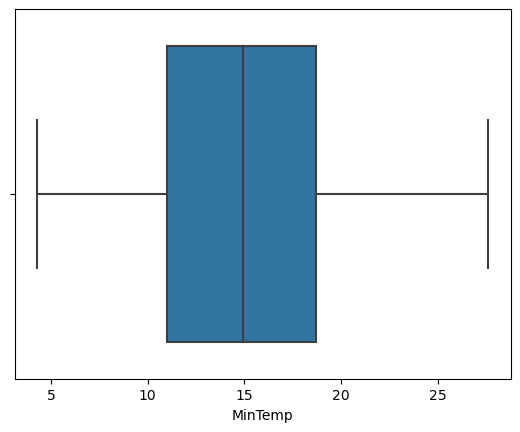

In [15]:
# Plotting boxplot for identifying outlier
sns.boxplot(weather_data['MinTemp'])

<AxesSubplot:xlabel='MaxTemp'>

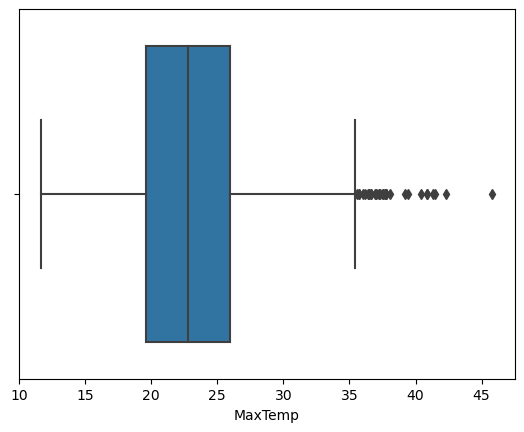

In [16]:
sns.boxplot(data = weather_data, x = 'MaxTemp')

<AxesSubplot:xlabel='MaxTemp'>

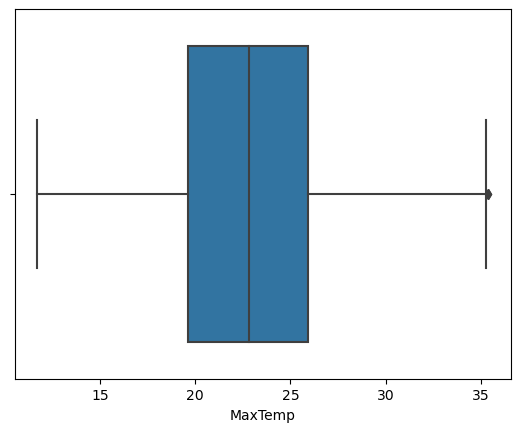

In [17]:
# Calculate the IQR for the column

Q1 = weather_data['MaxTemp'].quantile(0.25)
Q3 = weather_data['MaxTemp'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers

threshold = 1.5

# Remove outliers from the column
upper_range = Q3 + threshold * IQR

weather_data = weather_data[weather_data['MaxTemp'] <= upper_range]

# Generate a box plot for the filtered column
sns.boxplot(data=weather_data, x='MaxTemp')


<AxesSubplot:xlabel='Rainfall'>

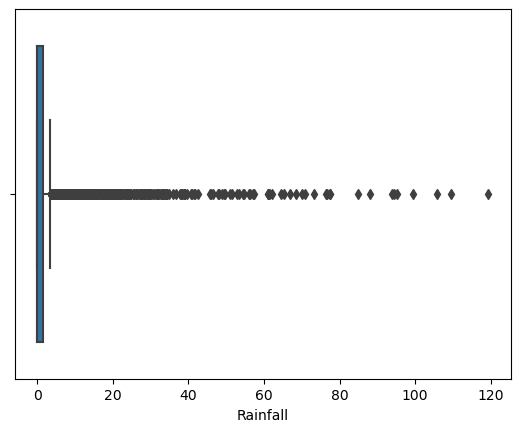

In [18]:
sns.boxplot(data = weather_data, x = 'Rainfall')

<AxesSubplot:xlabel='Rainfall'>

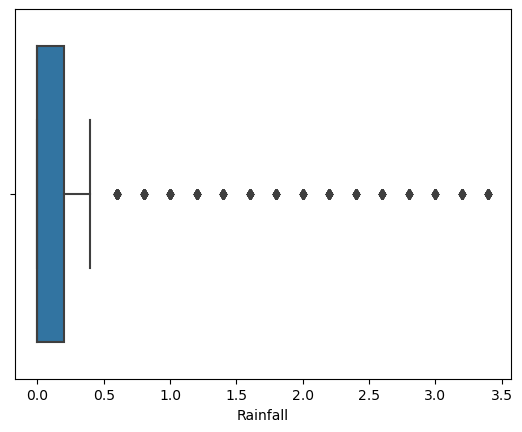

In [19]:
# Calculate the IQR for the column

Q1 = weather_data['Rainfall'].quantile(0.25)
Q3 = weather_data['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers

threshold = 1.5

# Remove outliers from the column
upper_range = Q3 + threshold * IQR 
lower_range = Q1 - threshold * IQR

weather_data = weather_data[(weather_data['Rainfall'] >= Q1 - threshold * IQR) & (weather_data['Rainfall'] <= Q3 + threshold * IQR)]

# Generate a box plot for the filtered column
sns.boxplot(data=weather_data, x='Rainfall')

<AxesSubplot:xlabel='Evaporation'>

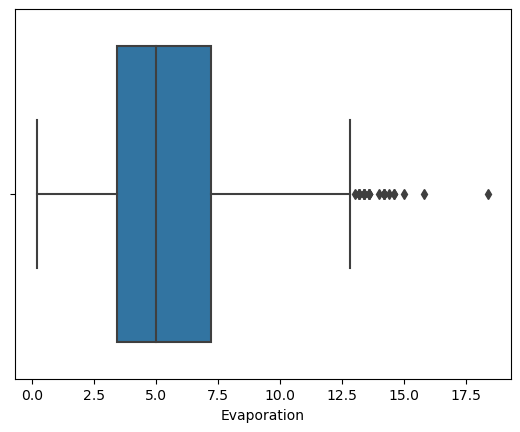

In [20]:
sns.boxplot(data=weather_data, x='Evaporation')

<AxesSubplot:xlabel='Evaporation'>

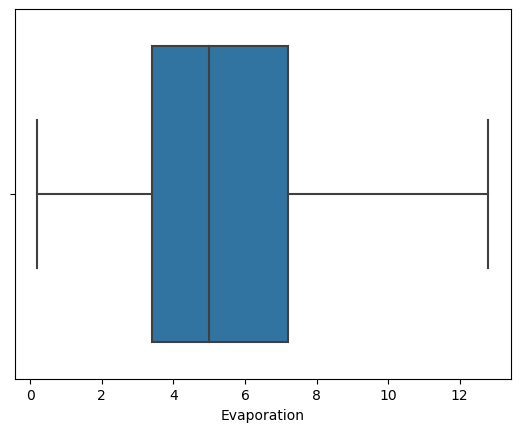

In [21]:
# Calculate the IQR for the column

Q1 = weather_data['Evaporation'].quantile(0.25)
Q3 = weather_data['Evaporation'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers

threshold = 1.5

# Remove outliers from the column
upper_range = Q3 + threshold * IQR 
lower_range = Q1 - threshold * IQR

weather_data = weather_data[(weather_data['Evaporation'] >= Q1 - threshold * IQR) & (weather_data['Evaporation'] <= Q3 + threshold * IQR)]

# Generate a box plot for the filtered column
sns.boxplot(data=weather_data, x='Evaporation')

<AxesSubplot:xlabel='Sunshine'>

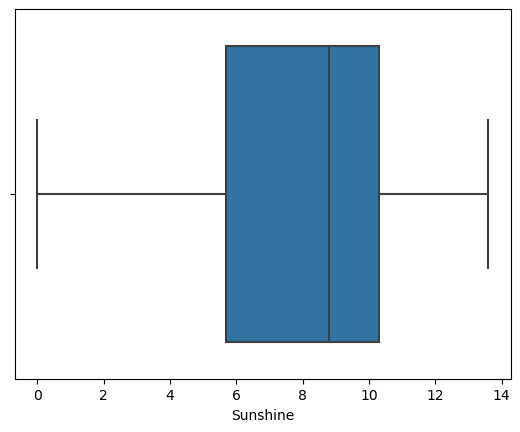

In [22]:

sns.boxplot(data=weather_data, x='Sunshine')

<AxesSubplot:xlabel='Humidity9am'>

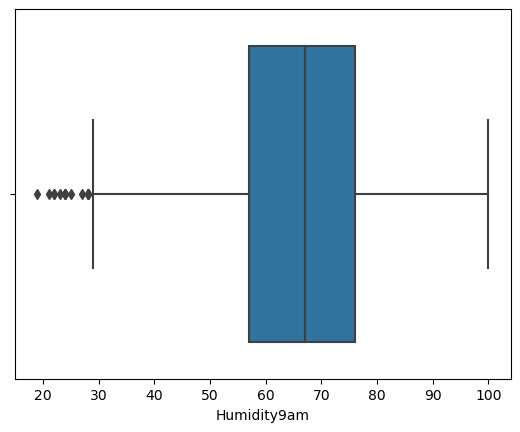

In [23]:
sns.boxplot(data=weather_data, x='Humidity9am')

<AxesSubplot:xlabel='Humidity9am'>

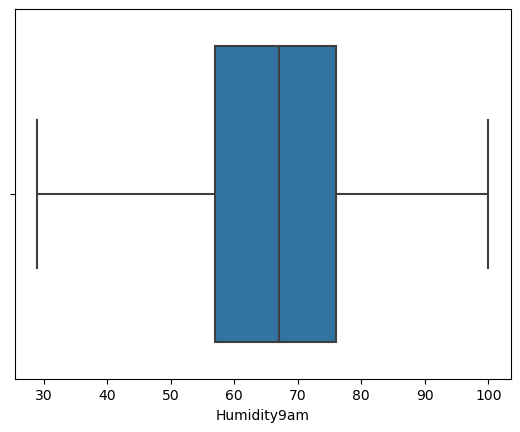

In [24]:
# Calculate the IQR for the column

Q1 = weather_data['Humidity9am'].quantile(0.25)
Q3 = weather_data['Humidity9am'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers

threshold = 1.5

# Remove outliers from the column
upper_range = Q3 + threshold * IQR 
lower_range = Q1 - threshold * IQR

weather_data = weather_data[(weather_data['Humidity9am'] >= Q1 - threshold * IQR) & (weather_data['Humidity9am'] <= Q3 + threshold * IQR)]

# Generate a box plot for the filtered column
sns.boxplot(data=weather_data, x='Humidity9am')

<AxesSubplot:xlabel='Humidity3pm'>

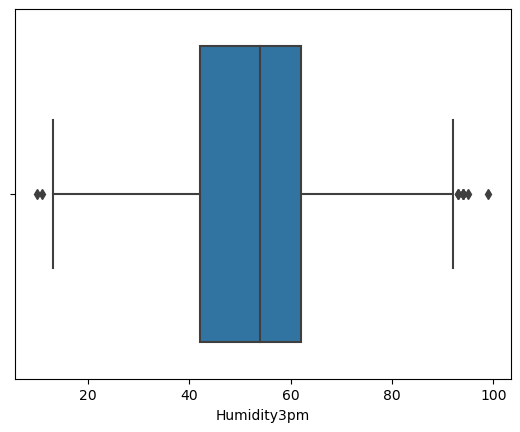

In [25]:
sns.boxplot(data=weather_data, x='Humidity3pm')

<AxesSubplot:xlabel='Humidity3pm'>

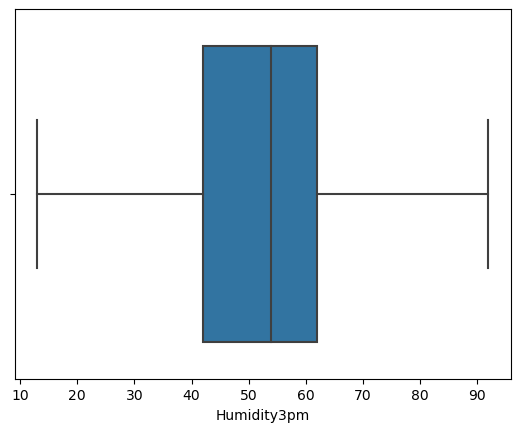

In [26]:
# Calculate the IQR for the column

Q1 = weather_data['Humidity3pm'].quantile(0.25)
Q3 = weather_data['Humidity3pm'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers

threshold = 1.5

# Remove outliers from the column
upper_range = Q3 + threshold * IQR 
lower_range = Q1 - threshold * IQR

weather_data = weather_data[(weather_data['Humidity3pm'] >= Q1 - threshold * IQR) & (weather_data['Humidity3pm'] <= Q3 + threshold * IQR)]

# Generate a box plot for the filtered column
sns.boxplot(data=weather_data, x='Humidity3pm')

<AxesSubplot:xlabel='Pressure9am'>

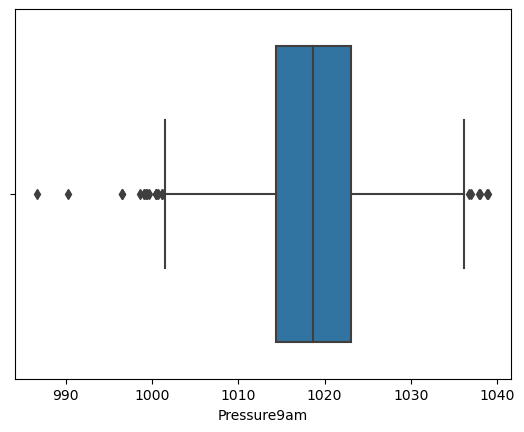

In [27]:
sns.boxplot(data=weather_data, x='Pressure9am')

<AxesSubplot:xlabel='Pressure9am'>

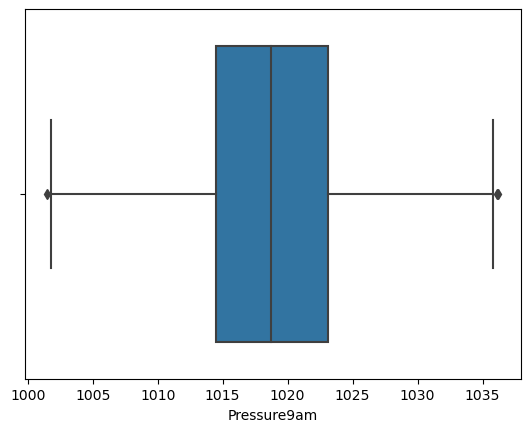

In [28]:
# Calculate the IQR for the column

Q1 = weather_data['Pressure9am'].quantile(0.25)
Q3 = weather_data['Pressure9am'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers

threshold = 1.5

# Remove outliers from the column
upper_range = Q3 + threshold * IQR 
lower_range = Q1 - threshold * IQR

weather_data = weather_data[(weather_data['Pressure9am'] >= Q1 - threshold * IQR) & (weather_data['Pressure9am'] <= Q3 + threshold * IQR)]

# Generate a box plot for the filtered column
sns.boxplot(data=weather_data, x='Pressure9am')

<AxesSubplot:xlabel='Pressure3pm'>

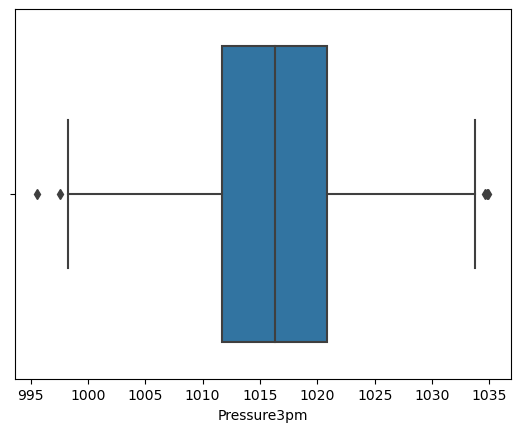

In [29]:
sns.boxplot(data=weather_data, x='Pressure3pm')

<AxesSubplot:xlabel='Pressure3pm'>

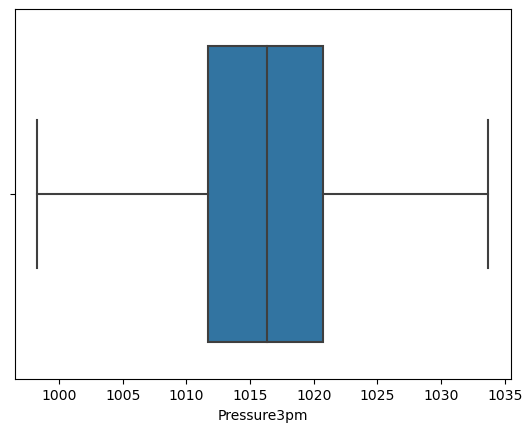

In [30]:
# Calculate the IQR for the column

Q1 = weather_data['Pressure3pm'].quantile(0.25)
Q3 = weather_data['Pressure3pm'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers

threshold = 1.5

# Remove outliers from the column
upper_range = Q3 + threshold * IQR 
lower_range = Q1 - threshold * IQR

weather_data = weather_data[(weather_data['Pressure3pm'] >= Q1 - threshold * IQR) & (weather_data['Pressure3pm'] <= Q3 + threshold * IQR)]

# Generate a box plot for the filtered column
sns.boxplot(data=weather_data, x='Pressure3pm')

<AxesSubplot:xlabel='Cloud9am'>

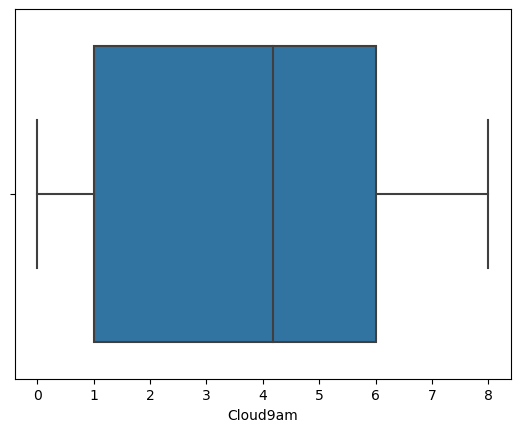

In [31]:
sns.boxplot(data=weather_data, x='Cloud9am')

<AxesSubplot:xlabel='Cloud3pm'>

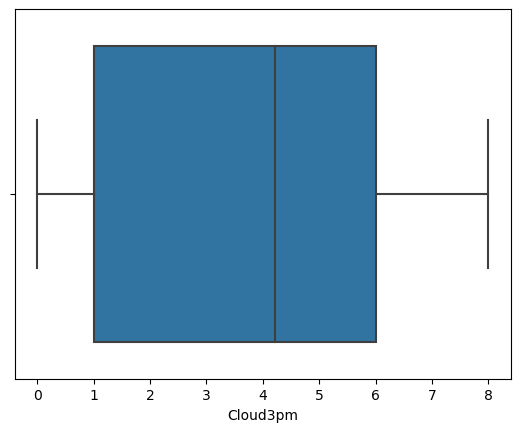

In [32]:
sns.boxplot(data=weather_data, x='Cloud3pm')

<AxesSubplot:xlabel='Temp9am'>

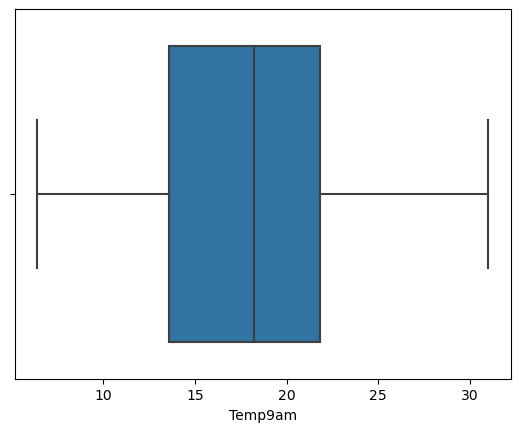

In [33]:
sns.boxplot(data=weather_data, x='Temp9am')

<AxesSubplot:xlabel='Temp3pm'>

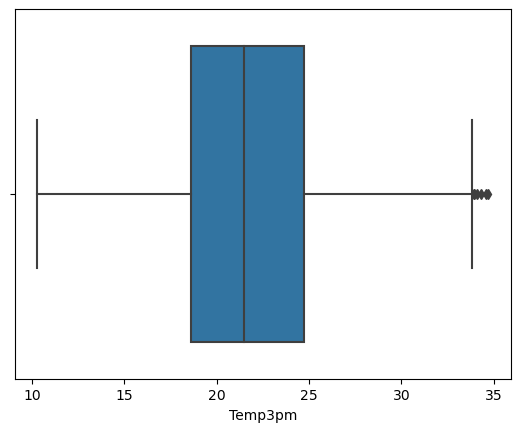

In [34]:
sns.boxplot(data=weather_data, x='Temp3pm')

<AxesSubplot:xlabel='Temp3pm'>

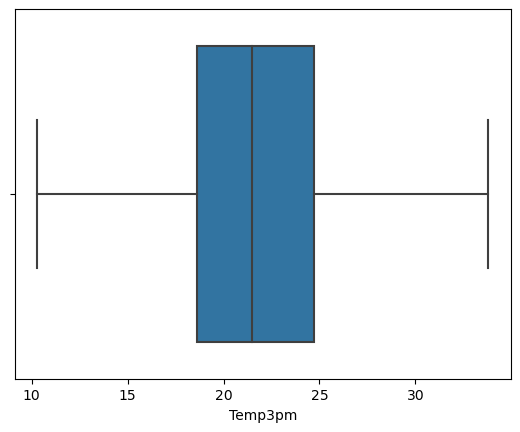

In [35]:
# Calculate the IQR for the column

Q1 = weather_data['Temp3pm'].quantile(0.25)
Q3 = weather_data['Temp3pm'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers

threshold = 1.5

# Remove outliers from the column
upper_range = Q3 + threshold * IQR 
lower_range = Q1 - threshold * IQR

weather_data = weather_data[(weather_data['Temp3pm'] >= Q1 - threshold * IQR) & (weather_data['Temp3pm'] <= Q3 + threshold * IQR)]

# Generate a box plot for the filtered column
sns.boxplot(data=weather_data, x='Temp3pm')

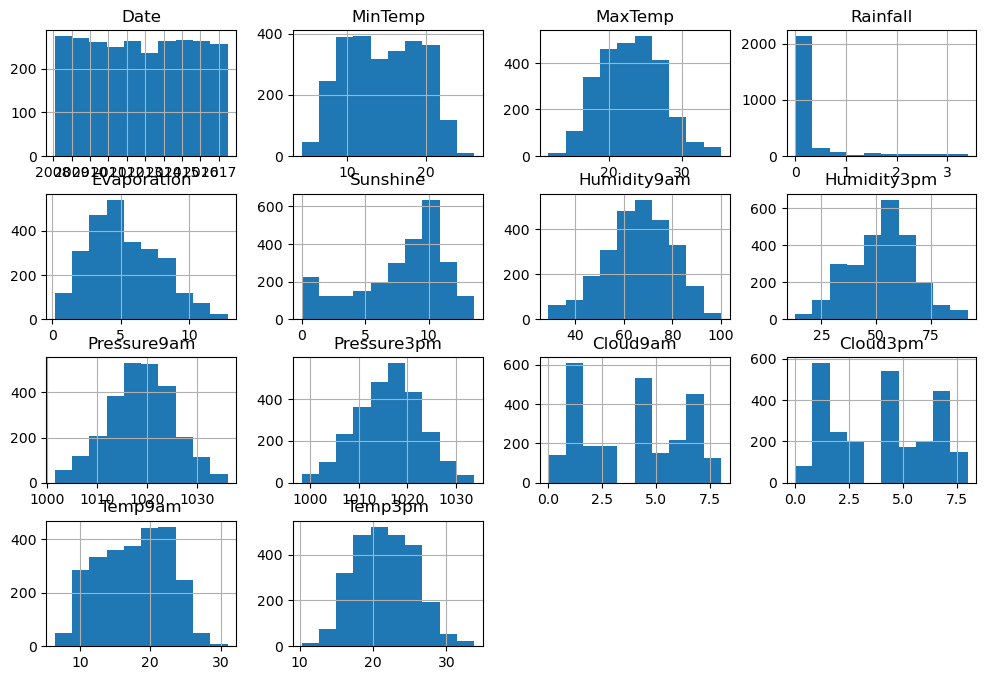

In [36]:
# Generating histograms to visualize the distribution of variables in the weather_data DataFrame

weather_data.hist(figsize = (12,8))
plt.show()

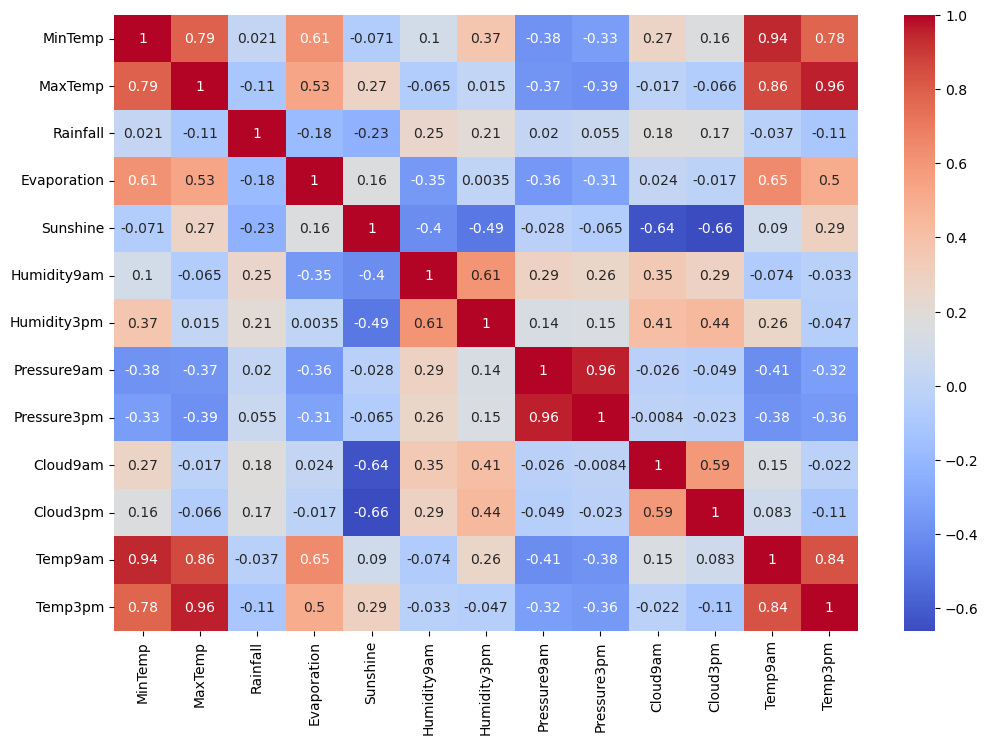

In [37]:
# Generating a heatmap to visualize the correlation between variables in the weather_data DataFrame

plt.figure(figsize = (12, 8))
sns.heatmap(weather_data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

### Data Visualization

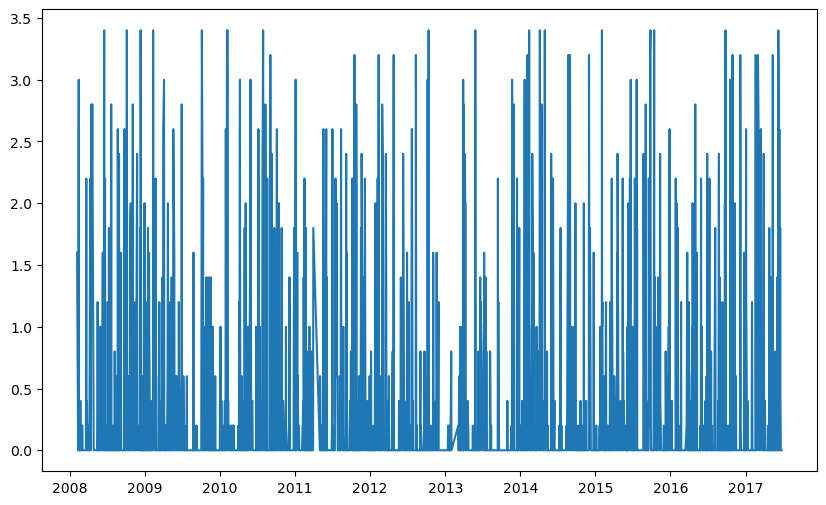

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(weather_data['Date'], weather_data['Rainfall'], label='Rainfall')

plt.show()

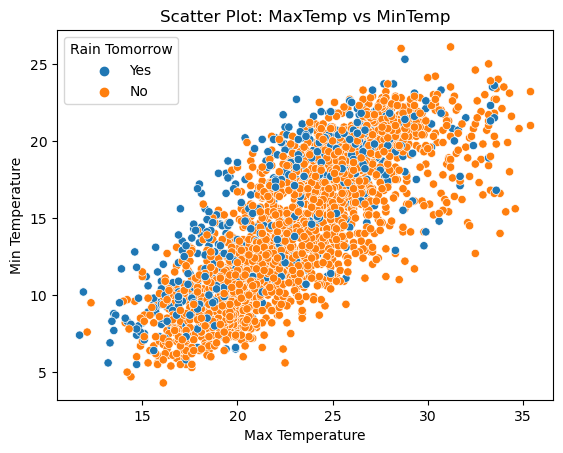

In [39]:
# Create scatter plot for MaxTemp vs MinTemp with color-coded RainTomorrow

sns.scatterplot(x='MaxTemp', y='MinTemp', hue='RainTomorrow', data=weather_data)

plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.title('Scatter Plot: MaxTemp vs MinTemp')
plt.legend(title='Rain Tomorrow')

plt.show()

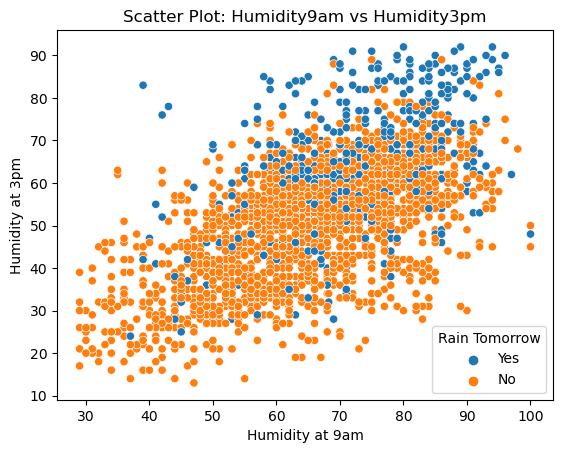

In [40]:
sns.scatterplot(x='Humidity9am', y='Humidity3pm', hue='RainTomorrow', data=weather_data)

plt.xlabel('Humidity at 9am')
plt.ylabel('Humidity at 3pm')
plt.title('Scatter Plot: Humidity9am vs Humidity3pm')
plt.legend(title='Rain Tomorrow')

plt.show()

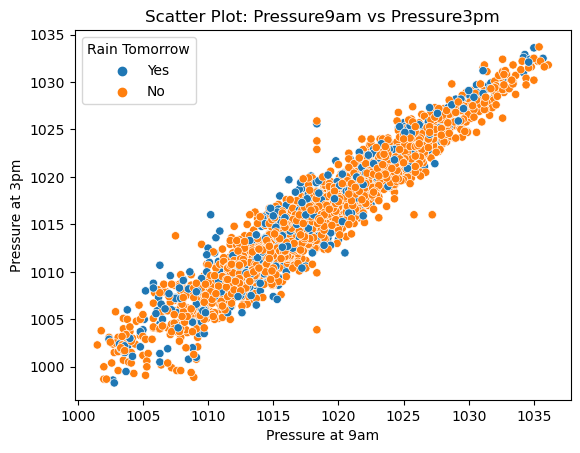

In [41]:
# Create scatter plot for MaxTemp vs MinTemp with color-coded RainTomorrow

sns.scatterplot(x='Pressure9am', y='Pressure3pm', hue='RainTomorrow', data=weather_data)

plt.xlabel('Pressure at 9am')
plt.ylabel('Pressure at 3pm')
plt.title('Scatter Plot: Pressure9am vs Pressure3pm')
plt.legend(title='Rain Tomorrow')

plt.show()

### Data Preparation for Training

In [42]:
# creating dummy variable

weather_data = pd.get_dummies(weather_data, columns=['RainToday', 'RainTomorrow'], drop_first=True)

In [43]:
weather_data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
5,2008-02-06,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,1,1
10,2008-02-11,16.4,23.9,0.0,6.4,8.0,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,0,0
11,2008-02-12,18.9,27.3,0.0,6.8,6.7,68.0,67.0,1010.7,1007.5,7.0,7.0,22.9,24.7,0,1
13,2008-02-14,16.9,24.3,3.0,3.2,8.7,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,1,0
14,2008-02-15,18.3,24.4,0.0,6.2,8.5,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,0,0


In [44]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 5 to 3336
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2603 non-null   datetime64[ns]
 1   MinTemp           2603 non-null   float64       
 2   MaxTemp           2603 non-null   float64       
 3   Rainfall          2603 non-null   float64       
 4   Evaporation       2603 non-null   float64       
 5   Sunshine          2603 non-null   float64       
 6   Humidity9am       2603 non-null   float64       
 7   Humidity3pm       2603 non-null   float64       
 8   Pressure9am       2603 non-null   float64       
 9   Pressure3pm       2603 non-null   float64       
 10  Cloud9am          2603 non-null   float64       
 11  Cloud3pm          2603 non-null   float64       
 12  Temp9am           2603 non-null   float64       
 13  Temp3pm           2603 non-null   float64       
 14  RainToday_Yes     2603 n

In [45]:
# # Converting uint8 categorical variables 'RainToday_Yes' and 'RainTomorrow_Yes' to integer type
weather_data['RainToday_Yes'] = weather_data['RainToday_Yes'].astype(int)
weather_data['RainTomorrow_Yes'] = weather_data['RainTomorrow_Yes'].astype(int)


In [46]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 5 to 3336
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2603 non-null   datetime64[ns]
 1   MinTemp           2603 non-null   float64       
 2   MaxTemp           2603 non-null   float64       
 3   Rainfall          2603 non-null   float64       
 4   Evaporation       2603 non-null   float64       
 5   Sunshine          2603 non-null   float64       
 6   Humidity9am       2603 non-null   float64       
 7   Humidity3pm       2603 non-null   float64       
 8   Pressure9am       2603 non-null   float64       
 9   Pressure3pm       2603 non-null   float64       
 10  Cloud9am          2603 non-null   float64       
 11  Cloud3pm          2603 non-null   float64       
 12  Temp9am           2603 non-null   float64       
 13  Temp3pm           2603 non-null   float64       
 14  RainToday_Yes     2603 n

In [47]:
# Defining X (Indepedent) and y (dependent) variable

X = weather_data.drop(columns=['RainTomorrow_Yes', 'Date'])
y = weather_data['RainTomorrow_Yes']

In [48]:
# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
# getting shape of data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1952, 14)
(651, 14)
(1952,)
(651,)


#### Decision Tree Classification

In [50]:
# Creating a Decision Tree classifier and fitting it to the training data

from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree_model = DecisionTreeClassifier(max_depth = 3)

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
# Predicting the target variable using the fitted Decision Tree model on the test data

y_pred_test = decision_tree_model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
# Predicting the target variable using the fitted Decision Tree model on the training data

y_pred_train = decision_tree_model.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
# Calculating and printing accuracy scores for the training and test predictions

from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score_train = accuracy_score(y_train, y_pred_train)

accuracy_score_test = accuracy_score(y_test, y_pred_test)

print('Accuracy score for test data:', accuracy_score_test)
print('Accuracy score for training data:', accuracy_score_train)

Accuracy score for test data: 0.8433179723502304
Accuracy score for training data: 0.8473360655737705


In [54]:
# Calculating and printing confusion matrix for the training and test predictions

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

print('Confusion Matrix for test data')
print(confusion_matrix_test)
print('Confusion Matrix for train data')
print(confusion_matrix_train)

Confusion Matrix for test data
[[521   6]
 [ 96  28]]
Confusion Matrix for train data
[[1560   14]
 [ 284   94]]


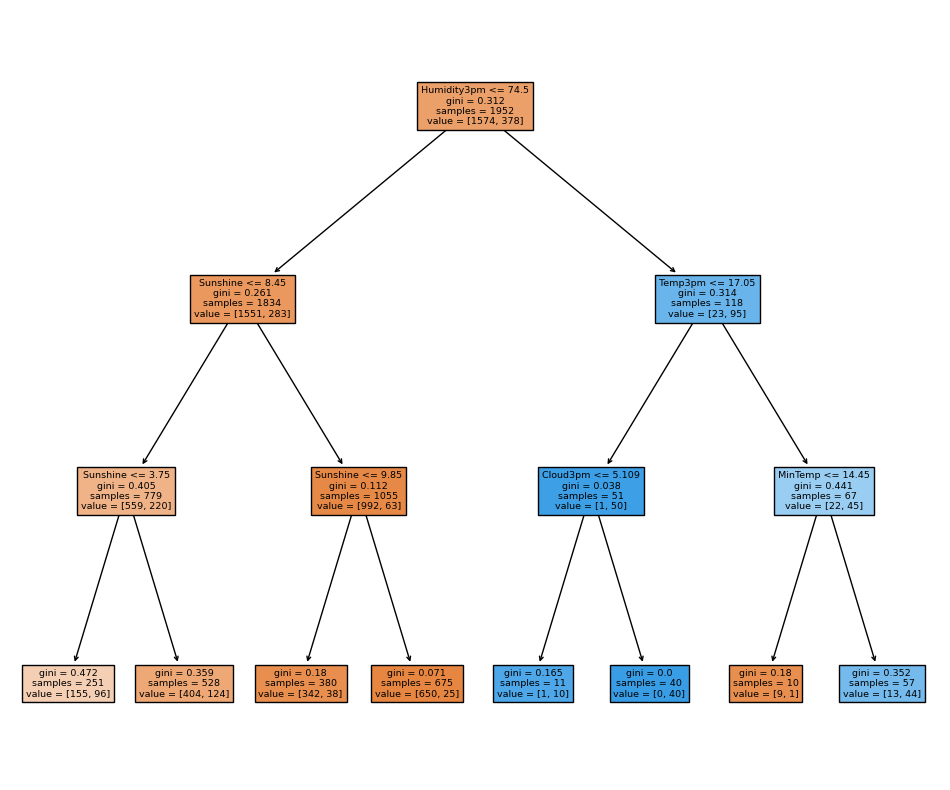

In [55]:
# Visualizing the Decision Tree using plot_tree

plt.figure(figsize = (12, 10))
plot_tree(decision_tree_model, feature_names=X.columns, filled = True)

plt.show()

### Bagging Classifier

In [56]:
# Creating a Bagging classifier and fitting it to the training data

from sklearn.ensemble import BaggingClassifier

bagging_classifier_model = BaggingClassifier(base_estimator = decision_tree_model, n_estimators = 1000,
                                             n_jobs = -1, bootstrap = True, random_state = 42)

In [57]:
bagging_classifier_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [58]:
y_pred_bagging = bagging_classifier_model.predict(X_test)

In [59]:
accuracy_score_bagging = accuracy_score(y_test, y_pred_bagging)

confusion_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

print('Accuracy Score :', accuracy_score_bagging)
print('Confusion matrix:',
      confusion_matrix_bagging)

Accuracy Score : 0.8463901689708141
Confusion matrix: [[521   6]
 [ 94  30]]


In [60]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Performing a grid search for hyperparameter tuning using GridSearchCV

param_grids = {'n_estimators': [100, 500, 1000],
         'max_samples': [0.5, 0.8, 1.0],
         'max_features': [0.5, 0.8, 1.0]}

grid_search_bagging_model = GridSearchCV(bagging_classifier_model, param_grids, cv = 5)

grid_search_bagging_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                         n_estimators=1000, n_jobs=-1,
                                         random_state=42),
             param_grid={'max_features': [0.5, 0.8, 1.0],
                         'max_samples': [0.5, 0.8, 1.0],
                         'n_estimators': [100, 500, 1000]})

In [63]:
# getting best parameter and best estimator value

print('Best estimator:', grid_search_bagging_model.best_estimator_)
print('Best parameter:', grid_search_bagging_model.best_params_)

Best estimator: BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  max_features=0.8, max_samples=0.5, n_estimators=100,
                  n_jobs=-1, random_state=42)
Best parameter: {'max_features': 0.8, 'max_samples': 0.5, 'n_estimators': 100}


In [64]:
# Predicting the target variable using the BaggingClassifier model with best hyperparameters

y_pred_bagging_cv = grid_search_bagging_model.predict(X_test)

accuracy_score_bagging_cv = accuracy_score(y_test, y_pred_bagging_cv)
confusion_matrix_bagging_cv = confusion_matrix(y_test, y_pred_bagging_cv)

print('Accuracy Score :', accuracy_score_bagging_cv)
print("Confusion Matrix:")
print(confusion_matrix_bagging_cv)

Accuracy Score : 0.8448540706605223
Confusion Matrix:
[[521   6]
 [ 95  29]]


In [66]:
# Choose one of the base estimators from the BaggingClassifier
bagging_classifier_model_estimator = bagging_classifier_model.estimators_[0]

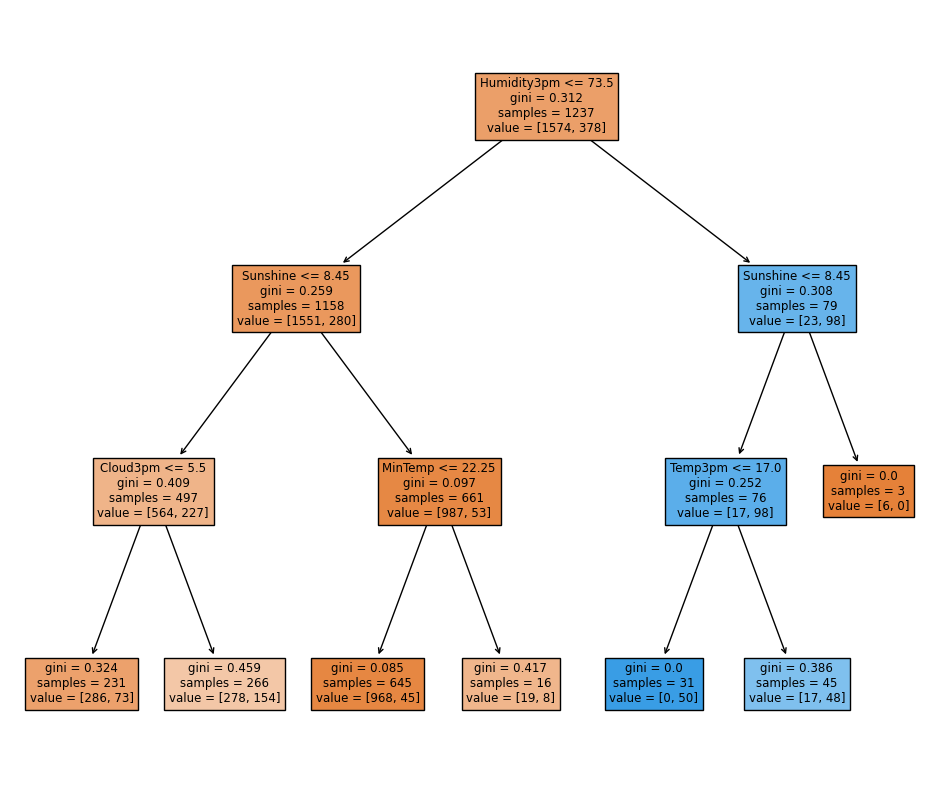

In [67]:
# Plot the decision tree of a single estimator within the BaggingClassifier

plt.figure(figsize=(12, 10))
plot_tree(bagging_classifier_model_estimator, feature_names=X.columns, filled=True)

plt.show()

### Random Forest Classification

In [68]:
# Creating a Random forest classifier and fitting it to the training data
from sklearn.ensemble import RandomForestClassifier

random_forest_classification_model = RandomForestClassifier(max_depth = 3, n_estimators = 100, n_jobs = -1, random_state = 42)

random_forest_classification_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [69]:
y_pred_random = random_forest_classification_model.predict(X_test)

In [70]:
accuracy_score_random = accuracy_score(y_test, y_pred_random)

confusion_matrix_random = confusion_matrix(y_test, y_pred_random)

print('Accuracy score :', accuracy_score_random)
print("Confusion Matrix:")
print(confusion_matrix_random)

Accuracy score : 0.8356374807987711
Confusion Matrix:
[[523   4]
 [103  21]]


In [71]:
param_grids = {'n_estimators': [100, 500, 1000],
         'max_samples': [0.5, 0.8, 1.0],
         'max_features': [0.5, 0.8, 1.0]}

grid_search = GridSearchCV(random_forest_classification_model, param_grids, cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, n_jobs=-1,
                                              random_state=42),
             param_grid={'max_features': [0.5, 0.8, 1.0],
                         'max_samples': [0.5, 0.8, 1.0],
                         'n_estimators': [100, 500, 1000]})

In [72]:
print('Best estimator:', grid_search.best_estimator_)
print('Best parameter:', grid_search.best_params_)

Best estimator: RandomForestClassifier(max_depth=3, max_features=1.0, max_samples=0.8,
                       n_jobs=-1, random_state=42)
Best parameter: {'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 100}


In [73]:
# Creating a Random Forest classification model with tuned hyperparameters using GridSearchCV results

random_forest_classification_model_cv = RandomForestClassifier(max_depth=3, max_features=0.5, max_samples=0.8,
                       n_estimators=500, n_jobs=-1, random_state=42)
random_forest_classification_model_cv.fit(X_train, y_train)

# Predicting the target variable using the Random Forest model
y_pred_random = random_forest_classification_model_cv.predict(X_test)

# Calculating accuracy score and confusion matrix for Random Forest predictions
accuracy_score_random = accuracy_score(y_test, y_pred_random)
confusion_matrix_random = confusion_matrix(y_test, y_pred_random)

print('Accuracy score :', accuracy_score_random)
print("Confusion Matrix:")
print(confusion_matrix_random)

Accuracy score : 0.8448540706605223
Confusion Matrix:
[[521   6]
 [ 95  29]]


In [74]:
# Choose one of the base estimators from the random forest classifier
random_forest_estimator = random_forest_classification_model_cv.estimators_[0]

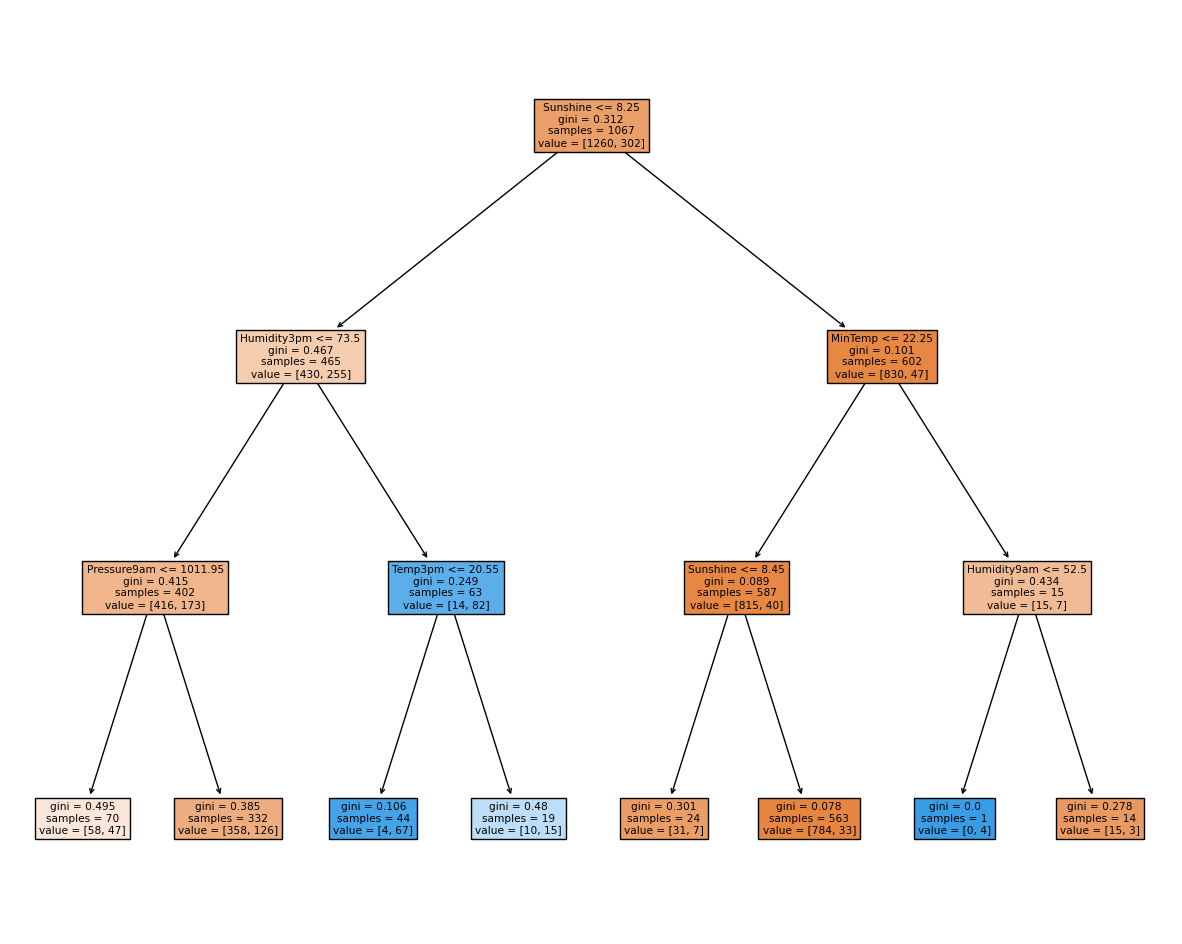

In [75]:
# Plot the decision tree of a single estimator within the RandomForestClassifier

plt.figure(figsize = (15, 12))
plot_tree(random_forest_estimator, feature_names = X.columns, filled = True)

plt.show()

### Gradient Boosting Classification Model

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_classifier_model = GradientBoostingClassifier(max_depth = 3, n_estimators = 1000, learning_rate = 0.02)

gradient_boosting_classifier_model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000)

In [77]:
y_pred_gb = gradient_boosting_classifier_model.predict(X_test)

In [78]:
accuracy_score_gb = accuracy_score(y_test, y_pred_gb)

confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print('Accuracy score :', accuracy_score_gb)
print("Confusion Matrix:")
print(confusion_matrix_gb)

Accuracy score : 0.8341013824884793
Confusion Matrix:
[[496  31]
 [ 77  47]]


In [79]:
# Choose one of the decision trees from the first boosting stage
gradient_boosting_estimator = gradient_boosting_classifier_model.estimators_[0][0]

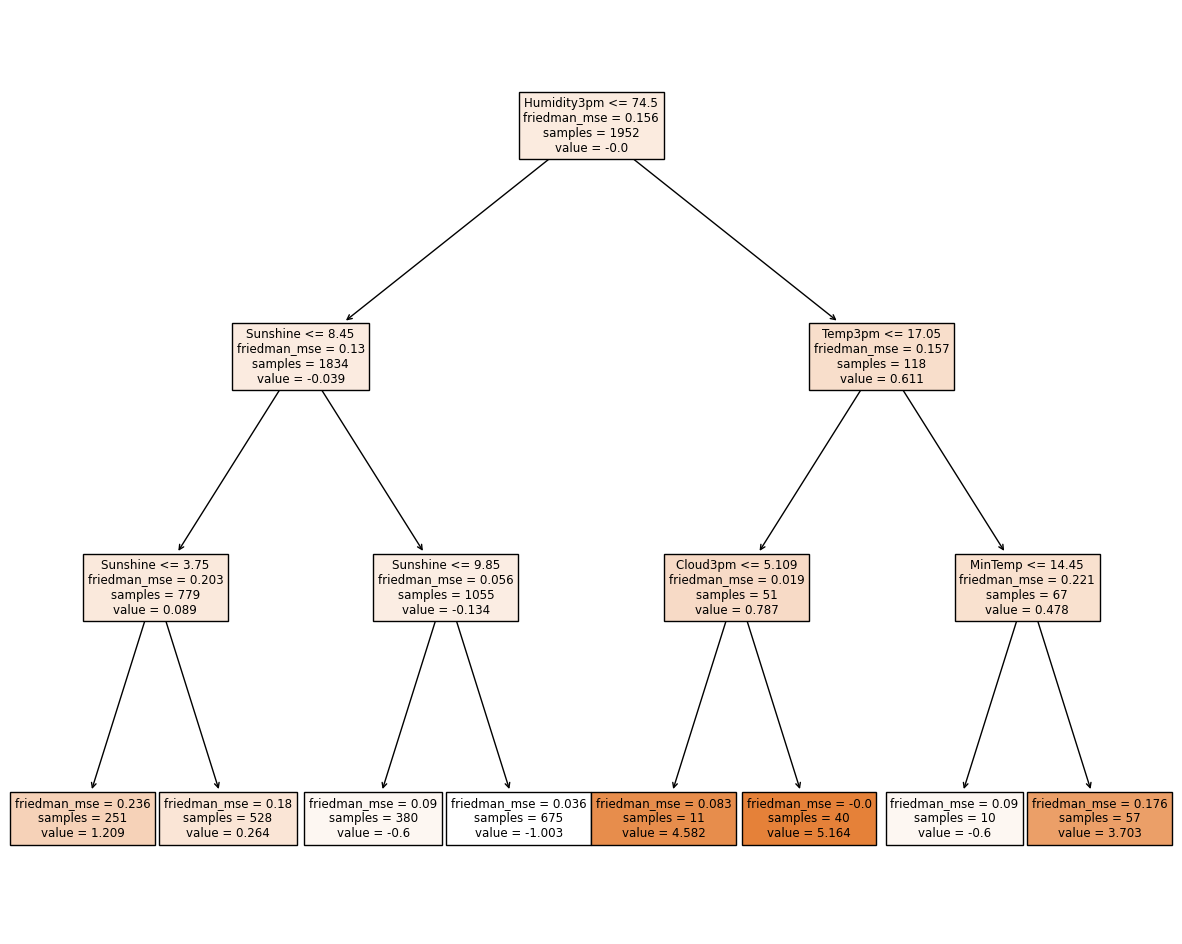

In [80]:
plt.figure(figsize = (15, 12))

plot_tree(gradient_boosting_estimator, feature_names = X.columns, filled = True)

plt.show()

### ADA Boost Classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier(n_estimators = 500)

ada_boost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500)

In [82]:
y_pred_ada = ada_boost_model.predict(X_test)

In [83]:
accuracy_score_ada = accuracy_score(y_test, y_pred_ada)

confusion_matrix_ada = confusion_matrix(y_test, y_pred_ada)

print('Accuracy score :', accuracy_score_ada)
print("Confusion Matrix:")
print(confusion_matrix_ada)

Accuracy score : 0.8202764976958525
Confusion Matrix:
[[491  36]
 [ 81  43]]


In [84]:
# Choose one of the decision trees from the first ada boosting stage
ada_boost_estimator = ada_boost_model.estimators_[0]

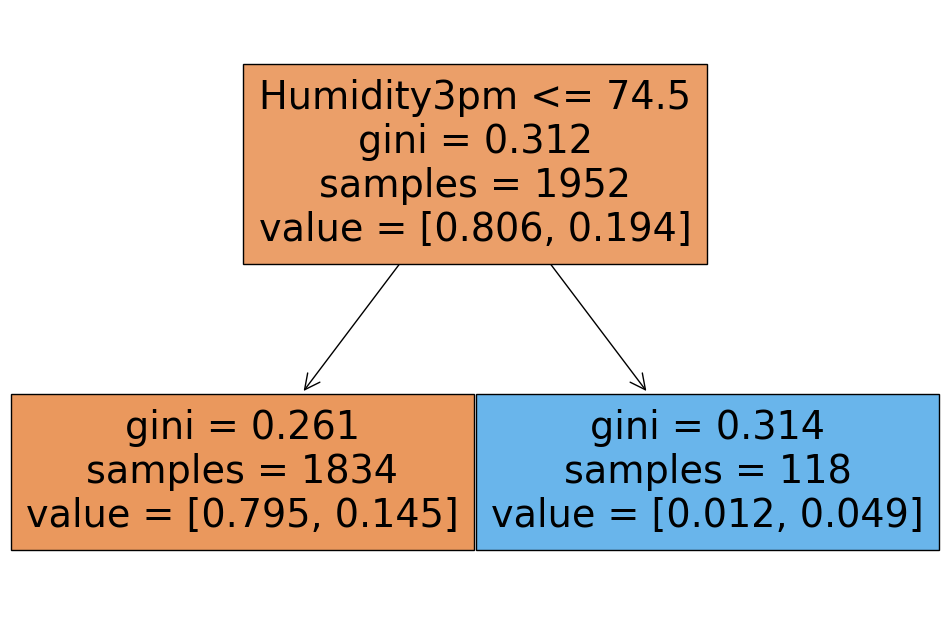

In [85]:
plt.figure(figsize = (12, 8))

plot_tree(ada_boost_estimator, feature_names = X.columns, filled = True)

plt.show()

In [86]:
import xgboost as xgb
from xgboost import XGBClassifier

In [87]:
# Create XGBoost classifier
xgb_model = XGBClassifier(max_depth = 3, n_estimators = 1000, n_jobs = -1, learning_rate = 0.8)

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_score_xgb)

# Create confusion matrix
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(confusion_matrix_xgb)


Accuracy: 0.8110599078341014
Confusion Matrix:
[[480  47]
 [ 76  48]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

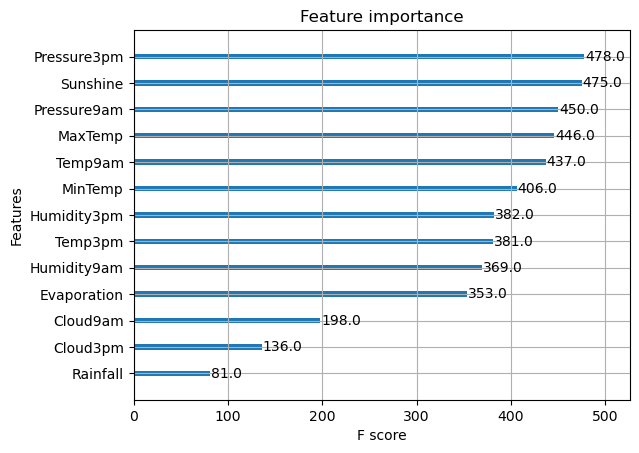

In [89]:
xgb.plot_importance(xgb_model)

In [90]:
param_test = { 'max_depth': [1, 3, 5, 7, 9],
              'gamma': [0.1, 0.2, 0.3],
              'sub_sample': [0.8, 0.9],
              'colsample_bytree': [ 0.8, 0.9],
              'reg_alpha': [1e-2,0.1, 1 ]
    
}

In [91]:
grid_search = GridSearchCV(xgb_model, param_test, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [92]:
grid_search.fit(X_train, y_train)

[21:03:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.8, m...
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                     

In [93]:
cv_xgb_model = grid_search.best_estimator_

In [94]:
accuracy_score(y_test, cv_xgb_model.predict(X_test))

0.8509984639016898

In [95]:
y_pred_cv_xgb = cv_xgb_model.predict(X_test)

In [96]:
result = { 'Actual' : y_test, 'Predicted' : y_pred_cv_xgb }
result = pd.DataFrame(result)
result.head()

,Actual,Predicted
1275,0,0
1715,0,0
2727,0,0
553,0,0
1737,0,0


XGBoost classifier model has the best accuracy score among all models so will be selecting XGBoost classifier and will train the model for rainfall prediction based on input data

[MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday]

In [97]:

# Creating a list of independent values
input_data = [18.9, 27.3, 3.2, 8.9, 7.5, 68.0, 67.0, 1010.7, 1007.5, 7.0, 7.0, 22.9, 24.7, 1]

# Converting list to numpy array
input_data_to_np_array = np.asarray(input_data)

# Reshaping the numpy array
input_data_reshaped = input_data_to_np_array.reshape(1, -1)

# Applying the Random Forest model to the reshaped numpy array
prediction = cv_xgb_model.predict(input_data_reshaped)

# Checking the prediction and providing the result
if prediction[0] == 0:
    print('No Rainfall')
else:
    print('Might Rainfall')

# Printing the dependent variable prediction
print('Rainfall Prediction:', prediction)


Might Rainfall
Rainfall Prediction: [1]


Q1. Your views about the problem statement?

Ans: The problem statement involves predicting rainfall in Sydney using various classification models. The goal is to create an accurate machine learning model that can predict whether it will rain tomorrow based on weather-related features. This problem is important for The Daily Buzz to enhance its weather prediction accuracy and provide valuable insights to its readers.

Q2.  What will be your approach to solving this task?

Ans: My approach to solving this task would involve the following steps:

Data Preprocessing: Load the dataset, handle missing values, encode categorical variables, and split the data into features (X) and target (y).
    
Exploratory Data Analysis (EDA): Perform EDA to understand data distribution, correlations, and patterns.
    
Data Splitting: Split the dataset into training and testing sets.
    
Model Training: Train multiple classification models, including Decision Trees, Random Forest, and Gradient Boosting.
    
Model Evaluation: Evaluate each model's performance using accuracy, confusion matrix, and other relevant metrics.
    
Select Best Model: Choose the best-performing model based on evaluation results.


Q3. What were the available ML model options you had to perform this task?

Ans: The available ML model options for this task are:

1) Decision Tree Classifier,

2) Random Forest Classifier,

3) Gradient Boosting Classifier,

4) ADA Boost Classifier,

5) XGBoost Classifier 

These above mentioned models are suitable for classification tasks and can handle the features related to weather conditions effectively.

Q4. Which model’s performance is best and what could be the possible reason for that?

Ans: The tuned XGBoost Classifier emerged as the leader in accuracy among all models evaluated. Its remarkable accuracy score on the test dataset exceeded that of other models, highlighting its exceptional predictive capabilities. Moreover, its confusion matrix indicated well-balanced and accurate predictions for both rainy and non-rainy days.

The outstanding accuracy of the tuned XGBoost Classifier can be attributed to its optimized hyperparameters and gradient boosting technique. Through careful tuning, the model's parameters were fine-tuned to extract the best performance from its boosting process. This allowed it to iteratively refine its predictions and capture intricate patterns in the weather data.

The tuned XGBoost Classifier's unmatched accuracy, aided by parameter optimization and gradient boosting, positions it as the optimal choice for rainfall prediction. Its ability to adaptively learn from errors and handle complex feature interactions makes it an invaluable tool for The Daily Buzz's accurate weather forecasting efforts.

Q5. What steps can you take to improve this selected model’s performance even further?

Ans: To improve the selected model's performance even further:

Feature Engineering: Explore creating new relevant features that might enhance prediction accuracy.

Hyperparameter Tuning: Fine-tune hyperparameters of the selected model to optimize its performance.

Ensembling Techniques: Consider using stacking or blending techniques to combine the strengths of different models.

More Data: If available, collecting more data can help improve the model's learning and generalization.

Advanced Features: Incorporate more advanced weather-related features if they are available.

Cross-Validation: Implement cross-validation for better estimation of model performance.